In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [32]:
plt.style.use("seaborn")

# Data preparation

In [33]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])

#normal distribution
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


# Data Visualize


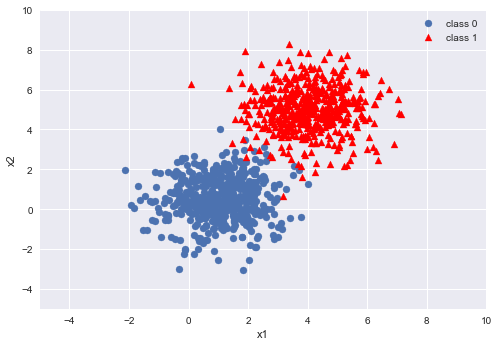

In [34]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],label="class 1",color="r",marker="^")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


# creating training and test data

In [35]:

data=np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [36]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [37]:
np.random.shuffle(data)
print(data[:10])

[[5.7417658  5.13594219 1.        ]
 [4.02411308 6.56744115 1.        ]
 [1.25873553 0.21559462 0.        ]
 [1.08599304 1.54514522 0.        ]
 [5.47552079 3.6742606  1.        ]
 [3.48808372 3.71545392 1.        ]
 [1.96139905 0.66328415 0.        ]
 [5.28129435 4.352673   1.        ]
 [4.83596099 6.51342577 1.        ]
 [0.09654861 1.01537049 0.        ]]


In [38]:
split = int(0.8*data.shape[0])

In [39]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [40]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]


In [41]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

In [42]:
print(l)

0.0909258840269132


# logistic regression functions

In [22]:
def hypothesis(x,w,b):
    '''accepts one input vector x, input weight vector w, bias b'''
    h=np.dot(x,w)+b
    return sigmoid(h)
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))
def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i] *np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    return -err/m
def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
    return [grad_w/m,grad_b/m]
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    return err,w,b
def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
def get_acc(x_test,y_test,w,b):
    y_pred=[]
    for i in range(x_test.shape[0]):
        p=predict(x_test[i],w,b)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    return ((y_pred==y_test).sum())/y_test.shape[0]

                   
                                                
    
        
    
    

In [25]:
loss=[]
acc=[]
w=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()
for i in range(1000):
    l,w,b=grad_descent(X_train,Y_train,w,b,learning_rate=0.1)
    loss.append(l)
    acc.append(get_acc(X_test,Y_test,w,b))
print(l)

0.10091031667265497


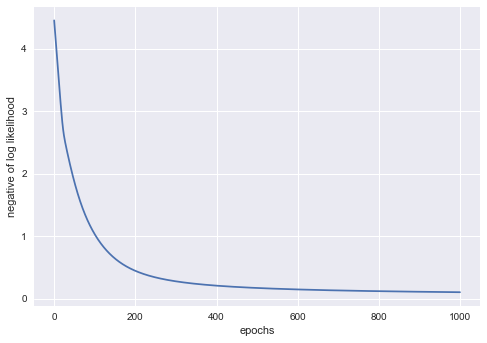

In [26]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("negative of log likelihood")
plt.show()

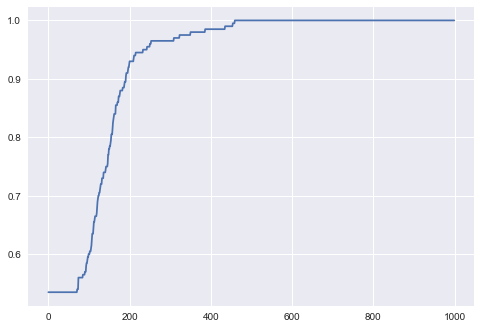

1.0


In [27]:
plt.plot(acc)
plt.show()
print(acc[-1])


# decision boundary

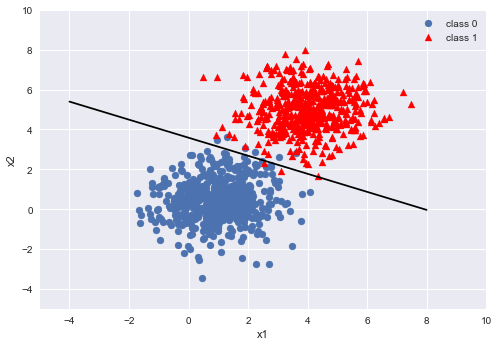

In [30]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],label="class 1",color="r",marker="^")
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

x=np.linspace(-4,8,10)
y=-(w[0]*x+b)/w[1]
plt.plot(x,y,color="k")


plt.show()
